### **1. Face Detection을 위한 패키지를 가져오기**

In [ ]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


In [ ]:
# colab을 사용하기 위해 드라이브 위치 확인
from google.colab import drive
drive.mount('/content/drive')

import os
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


### **2. 초기 이미지 가져오기**

True
/content


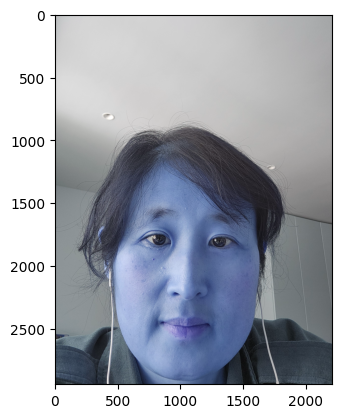

In [ ]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/selfie.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
print(os.path.exists(my_image_path))
print(os.getcwd())
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

### [이미지 가져오기 팁]
*   OpenCV는 이미지를 BGR 순서로 저장 및 처리
*   matplotlib와 같은 다른 라이브러리는 RGB(Red, Green, Blue) 순서임
*   OpenCV의 BGR 이미지를 matplotlib로 표시하려면 색상 변환 필요




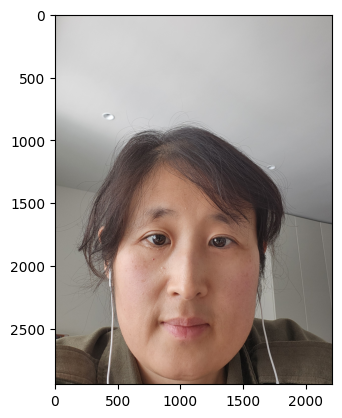

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌
plt.show() # 이미지 실제 출력

### **3. 이미지에서 얼굴의 위치 Boxing하기**
#### 3.1 얼굴 감지기 Detector 선언

In [ ]:
# 얼굴을 감지하는 기능인 detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [ ]:
# dlib을 사용하여 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid), '1'의 의미는 이미지를 원본크기 그대로 사용한다는 의미
print("🌫🛸")

🌫🛸


3.2 얼굴의 영역 찾아 Boxing하기

rectangles[[(485, 1508) (1635, 2658)]]


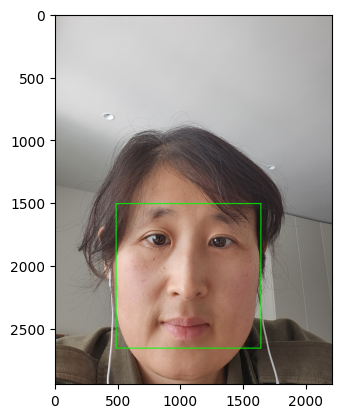

In [ ]:
# 여러 얼굴이 있을 수 있으므로 찾은 얼굴 영역 박스 리스트화 함.
# 각 rectangle(x1, y1, x2, y2)는 탐지된 얼굴의 경계 상자입니다.
# x1, y1: 사각형의 왼쪽 위 좌표
# x2, y2: 사각형의 오른쪽 아래 좌표
print(dlib_rects)
# 결과: rectangles[[(485, 1508) (1635, 2658)]] 처음 좌표는 사각형 왼쪽 위, 두번째 좌표는 사각형 오른쪽 아래

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽 485
    t = dlib_rect.top() # 위쪽 1508
    r = dlib_rect.right() # 오른쪽 1635
    b = dlib_rect.bottom() # 아래쪽 2658

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림 - Boxing 생성
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3.3 Dlib landmark localization

- 사각형 테두리 안에서 이목구비 찾기

In [ ]:
# 추가적으로 필요한 패키지 업데이트 또는 인스톨하기
!pip install --upgrade dlib
!apt-get update
!apt-get install -y cmake
!pip install dlib

  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Fetched 261 kB in 1s (205 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'htt

### 3.4 얼굴의 68개 랜드마크를 가진 모델 적용

In [ ]:
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = '/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat'

print(os.path.exists(model_path))

landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

print("🌫🛸")

True
🌫🛸


In [ ]:
# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []


# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


### 3.5 이미지내 얼굴 랜드마크 Detection하고 점으로 표시

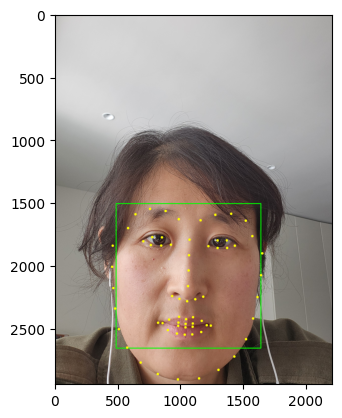

In [ ]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 15)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력




In [ ]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1056, 2165)
(x,y) : (1056,1590)
(w,h) : (1151,1151)


### 3.6 고양이 콧수염 이미지를 코의 가운데 위치를 중심으로 합치기

In [2]:
# from google.colab.patches import cv2_imshow
# # 이미지 로드
# image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/selfie.jpg")
# whiskers = cv2.imread("/content/drive/MyDrive/Colab Notebooks/cat-whiskers.png", -1)
# # -1 의미: 를 투명도 채널 (알파 채널)을 포함한 상태로 읽음
# # 그 결과 whiskers 변수는 4개의 채널(BGR + 알파 채널)을 가진 이미지를 포함하게됨.

# # 이미지에서 코 위치 찾기 (예: landmark[33]으로 코의 위치 찾음)
# x = landmark[33][0]  # x좌표
# y = landmark[33][1]  # y좌표

# # landmark[33]과 landmark[30]의 중간 지점 구하기
# #x = (landmarks.landmark[30].x + landmarks.landmark[33].x) / 2  # x 좌표의 평균
# #y = (landmarks.landmark[30].y + landmarks.landmark[33].y) / 2  # y 좌표의 평균

# w = h = dlib_rect.width()  # 얼굴 영역의 가로를 이용해서 콧수염 크기 설정

# # 콧수염 이미지의 크기 조정
# whiskers_resized = cv2.resize(whiskers, (w, h))  # 얼굴 크기에 맞게 콧수염 크기 조정

# # 콧수염 이미지의 크기와 중심을 맞추기 위해 콧수염 중심을 (x, y)에 맞추기
# whiskers_h, whiskers_w = whiskers_resized.shape[:2]
# x_offset = int(x - whiskers_w / 2)  # 콧수염 이미지의 중심을 x 위치로 맞추기 위한 오프셋
# y_offset = int(y - whiskers_h / 2)  # 콧수염 이미지의 중심을 y 위치로 맞추기 위한 오프셋

# # 콧수염의 알파 채널 (투명도 채널) 분리
# #고양이 이미지에서 height 전체, width 전체의 알파채널값을 가져와서 255.0으로 나눠 0~1사이 값을 가지도록 정규화함
# # 0.0 (완전 투명)에서 1.0 (완전 불투명) 사이로 변환
# alpha_channel = whiskers_resized[:, :, 3] / 255.0

# alpha_inv = 1.0 - alpha_channel

# # 고양이 콧수염 이미지의 영역을 원본 이미지에 덮어씌우기
# for c in range(0, 3):  # 3개의 채널 (BGR)
#     image[y_offset:y_offset+whiskers_h, x_offset:x_offset+whiskers_w, c] = (
#         alpha_channel * whiskers_resized[:, :, c] + alpha_inv * image[y_offset:y_offset+whiskers_h, x_offset:x_offset+whiskers_w, c]
#     )



# # 결과 이미지 출력
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()




🌫🛸


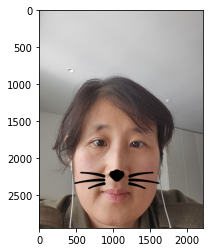

In [4]:
# 필요한 패키지 import 하기
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리

print("🌫🛸")

my_whiskers = 'face_with_whiskers.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_whiskers)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

### 3.6 얼굴의 옆모습을 보고도 detection이 잘 이뤄지는지 실험

*   디텍션은 잘 이뤄질것 같음
*   고양이 수염을 비율에 맞게 조정가능할지?

True
/content


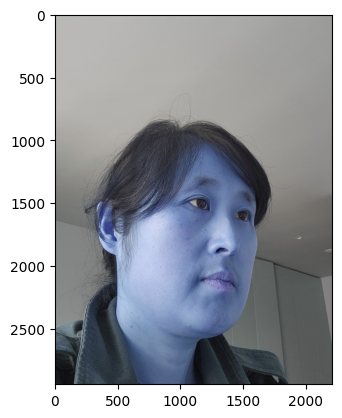

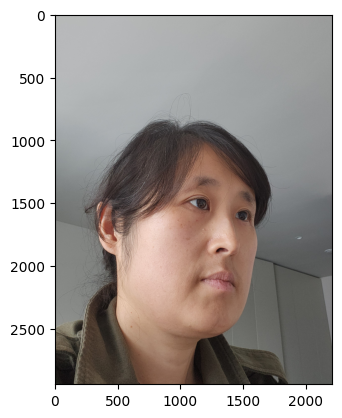

In [ ]:
# 왼쪽 방향에서 face detecion
# 1. 왼쪽에서 찍은 얼굴사진 이미지 준비하기

my_image_path_left = '/content/drive/MyDrive/Colab Notebooks/selfie_left.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
print(os.path.exists(my_image_path_left))
print(os.getcwd())
img_bgr = cv2.imread(my_image_path_left)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

### 3.7 왼쪽방향에서 찍은 얼굴 이미지에서 얼굴 영역 찾아보기

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")



🌫🛸
🌫🛸


rectangles[[(613, 1252) (1763, 2403)]]


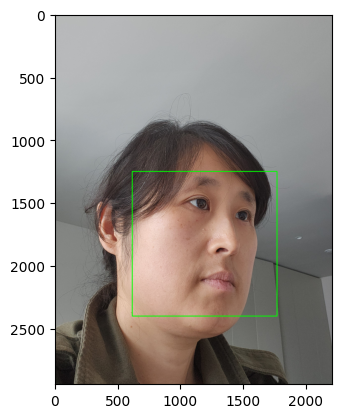

In [ ]:
# 얼굴 영역 찾아보기
# 각 rectangle(x1, y1, x2, y2)는 탐지된 얼굴의 경계 상자입니다.
# x1, y1: 사각형의 왼쪽 위 좌표
# x2, y2: 사각형의 오른쪽 아래 좌표
print(dlib_rects)
# 결과: rectangles[[(613, 1252) (1763, 2403)]]
# 처음 좌표는 사각형 왼쪽 위, 두번째 좌표는 사각형 오른쪽 아래


for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3.8 68개의 얼굴 랜드마크 찾기

In [ ]:
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = '/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat'

print(os.path.exists(model_path))

landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

print("🌫🛸")

True
🌫🛸


In [ ]:
# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []


# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


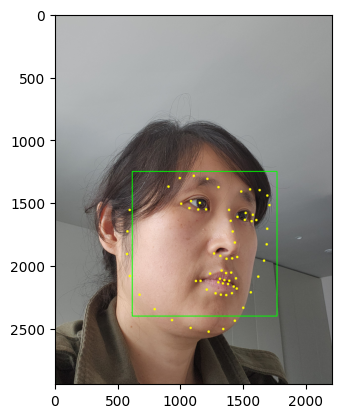

In [ ]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 15)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

### 3.9 콧수염 붙이기

In [ ]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(1428,1242) (1151,1151)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1428, 1818)
(x,y) : (1428,1242)
(w,h) : (1151,1151)


In [1]:
# from google.colab.patches import cv2_imshow
# # 이미지 로드
# image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/selfie_left.jpg")
# whiskers = cv2.imread("/content/drive/MyDrive/Colab Notebooks/cat-whiskers.png", -1)  # 고양이 콧수염 이미지 (투명 배경 PNG)

# # 이미지에서 코 위치 찾기 (예: landmark[30]으로 코의 위치 찾음)
# #x = landmark[30][0]  # x좌표
# #y = landmark[30][1]  # y좌표

# # landmark[33]과 landmark[30]의 중간 지점 구하기
# x = (landmark[30][0] + landmark[33][0]) / 2  # x 좌표의 평균
# y = (landmark[30][1] + landmark[33][1]) / 2  # y 좌표의 평균

# w = h = dlib_rect.width()  # 얼굴 영역의 가로를 이용해서 콧수염 크기 설정

# # 콧수염 이미지의 크기 조정
# whiskers_resized = cv2.resize(whiskers, (w, h))  # 얼굴 크기에 맞게 콧수염 크기 조정

# # 콧수염 이미지의 크기와 중심을 맞추기 위해 콧수염 중심을 (x, y)에 맞추기
# whiskers_h, whiskers_w = whiskers_resized.shape[:2]
# x_offset = int(x - whiskers_w / 2)  # 콧수염 이미지의 중심을 x 위치로 맞추기 위한 오프셋
# y_offset = int(y - whiskers_h / 2)  # 콧수염 이미지의 중심을 y 위치로 맞추기 위한 오프셋

# # 콧수염의 알파 채널 (투명도 채널) 분리
# alpha_channel = whiskers_resized[:, :, 3] / 255.0
# alpha_inv = 1.0 - alpha_channel

# # 고양이 콧수염 이미지의 영역을 원본 이미지에 덮어씌우기
# for c in range(0, 3):  # 3개의 채널 (BGR)
#     image[y_offset:y_offset+whiskers_h, x_offset:x_offset+whiskers_w, c] = (
#         alpha_channel * whiskers_resized[:, :, c] + alpha_inv * image[y_offset:y_offset+whiskers_h, x_offset:x_offset+whiskers_w, c]
#     )


# # 결과 이미지 출력
# # cv2_imshow(image)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

### 옆얼굴에 고양이 수염 붙이기
 - 얼굴은 옆모습인데, 수염은 정면이라 어색함이 있음

🌫🛸


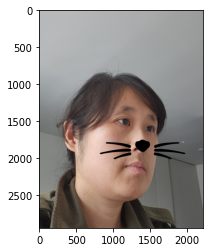

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

#
my_side_whiskers = 'face_side_with_whiskers.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_side_whiskers)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


### 3.10 고양이 콧수염 이미지 변형
 - 왼쪽은 그대로, 오른쪽은 0.6


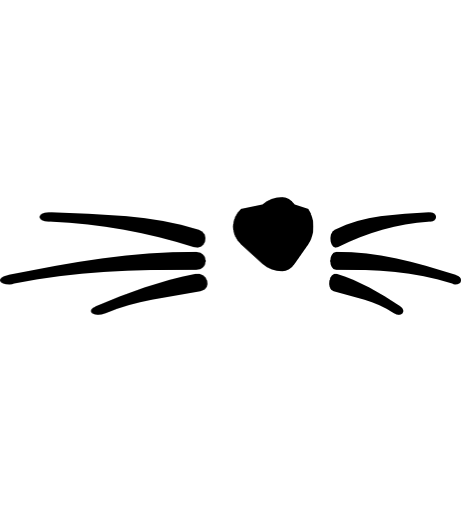

In [ ]:

# 고양이 수염 이미지 불러오기
whiskers = cv2.imread("/content/drive/MyDrive/Colab Notebooks/cat-whiskers.png", -1)

# 고양이 수염 이미지의 크기 조정 비율 설정
height, width = whiskers.shape[:2]

# 왼쪽은 크게, 오른쪽은 작게
left_ratio = 1.1  # 왼쪽 부분 크기 비율 (1.1배 크게)
right_ratio = 0.7  # 오른쪽 부분 크기 비율 (0.7배 작게)

# 수염을 왼쪽과 오른쪽으로 나누기
left_whisker = whiskers[:, :width//2]
right_whisker = whiskers[:, width//2:]

# 왼쪽 부분 크기 조정
left_whisker_resized = cv2.resize(left_whisker, None, fx=left_ratio, fy=1, interpolation=cv2.INTER_LINEAR)

# 오른쪽 부분 크기 조정
right_whisker_resized = cv2.resize(right_whisker, None, fx=right_ratio, fy=1, interpolation=cv2.INTER_LINEAR)

# 두 부분을 다시 합치기
whiskers_resized = np.hstack((left_whisker_resized, right_whisker_resized))

# 결과 이미지 확인
cv2_imshow(whiskers_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()



Placing whiskers at: (944, 1612)


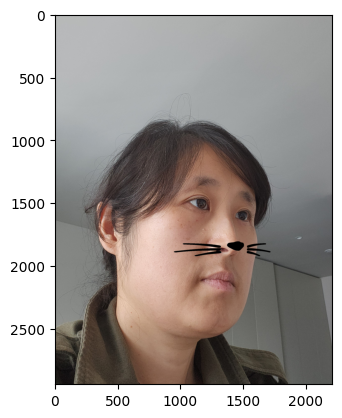

In [ ]:
import matplotlib.pyplot as plt

# 얼굴 이미지 로드
img_show = cv2.imread('/content/drive/MyDrive/Colab Notebooks/selfie_left.jpg')

# 콧수염 이미지 로드 (알파 채널 포함)
whisker_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cat-whiskers.png', cv2.IMREAD_UNCHANGED)

# 68개 랜드마크에서 코의 중심 위치 (인덱스 30)
center_x = landmark[30][0]  # X 중심
center_y = landmark[30][1]  # Y 중심

# 콧수염 이미지 크기
whisker_height, whisker_width = whisker_image.shape[:2]

# 왼쪽과 오른쪽 길이 다르게 하기
# 왼쪽은 길게, 오른쪽은 짧게 만들기 위해 이미지 좌우를 변형

# 왼쪽 영역 (좌측 부분을 늘림)
left_part = whisker_image[:, :whisker_width//2]  # 수염 이미지의 왼쪽 절반을 추출(행: 전체, 열: 왼쪽절반만)
left_part_resized = cv2.resize(left_part, (whisker_width, whisker_height))  # 크기 늘리기

# 오른쪽 영역 (우측 부분을 축소)
right_part = whisker_image[:, whisker_width//2:]  # 오른쪽 절반
right_part_resized = cv2.resize(right_part, (whisker_width//2, whisker_height))  # 크기 줄이기

# 두 부분 합치기
modified_whisker = np.hstack([left_part_resized, right_part_resized])

# 콧수염 이미지를 원본 이미지에 맞게 배치하기
# 원본 이미지에 콧수염을 올릴 위치 설정 (예시: 중심 좌표로부터 일정 높이)
# `center_x`, `center_y`를 그대로 사용해 좌표 설정
top_left_x = int(center_x - modified_whisker.shape[1] // 2) -100  # 중심 기준으로 좌우 배치
top_left_y = int(center_y - modified_whisker.shape[0] // 2) +50 # 수염 높이를 고려한 배치

# 콧수염 이미지가 정확한 위치에 배치되는지 확인
print(f"Placing whiskers at: ({top_left_x}, {top_left_y})")

# 이미지의 알파 채널을 기준으로 합성
for i in range(modified_whisker.shape[0]):
    for j in range(modified_whisker.shape[1]):
        # 알파 채널을 기준으로 합성 (투명도를 고려)
        if modified_whisker[i, j, 3] > 0:  # 알파 값이 0이 아니면
            img_show[top_left_y + i, top_left_x + j] = modified_whisker[i, j, :3]  # BGR값으로 설정

# 이미지 출력
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3.11 옆으로 누운 사람의 얼굴 detection

True
/content


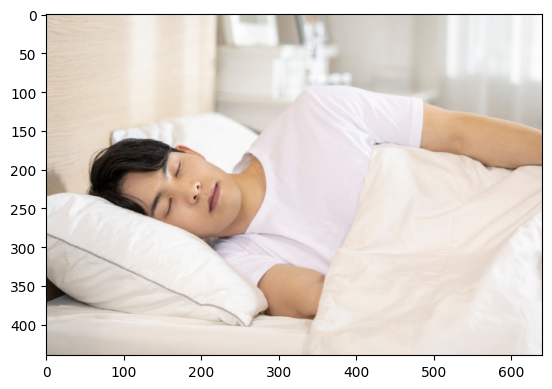

🌫🛸
🌫🛸


In [ ]:
# 옆으로 누운 사람의 얼굴 face detecion


my_image_path_left = '/content/drive/MyDrive/Colab Notebooks/image_side.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
print(os.path.exists(my_image_path_left))
print(os.getcwd())
img_bgr = cv2.imread(my_image_path_left)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
#plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
#plt.show() # 이미지를 출력해준다. (실제 출력)

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")




rectangles[]


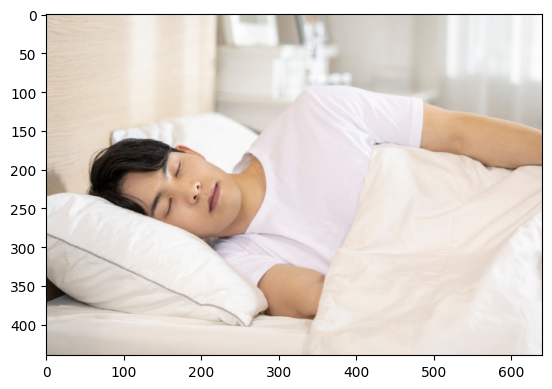

In [ ]:
# 얼굴 영역 찾아보기
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
# 각 rectangle(x1, y1, x2, y2)는 탐지된 얼굴의 경계 상자입니다.
# x1, y1: 사각형의 왼쪽 위 좌표
# x2, y2: 사각형의 오른쪽 아래 좌표
print(dlib_rects)
# 결과: rectangles[[(613, 1252) (1763, 2403)]]
# 처음 좌표는 사각형 왼쪽 위, 두번째 좌표는 사각형 오른쪽 아래


for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [ ]:

# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = '/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat'

print(os.path.exists(model_path))

landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

print("🌫🛸")

# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []


# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생




# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 15)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

True
🌫🛸


IndexError: list index out of range

### 박싱 못하고 landmark도 못찾음. 얼굴을 detecion못함

### 3.12 FaceMesh를 사용함

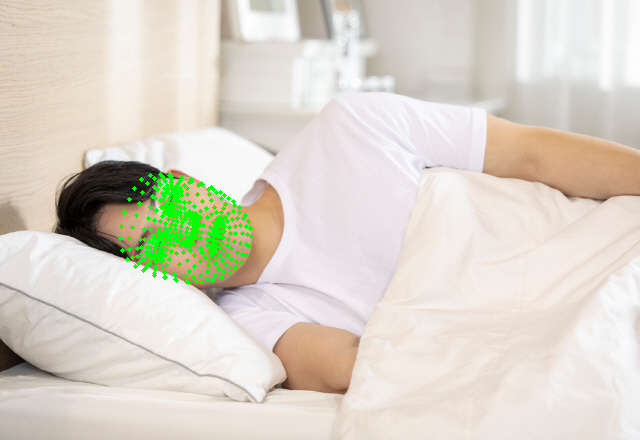

In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Mediapipe FaceMesh 모델 로드
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# 이미지 불러오기
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image_side.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크 추출
results = face_mesh.process(image_rgb)

# 얼굴 랜드마크 점 그리기
if results.multi_face_landmarks:
    for landmarks in results.multi_face_landmarks:
        for landmark in landmarks.landmark:
            # 이미지 크기
            height, width, _ = image.shape

            # 좌표를 픽셀 값으로 변환
            x = int(landmark.x * width)
            y = int(landmark.y * height)

            # 각 랜드마크 좌표에 점 찍기
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# 결과 이미지 표시
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

### 3.13 고양이 수염 방향 전환시키기

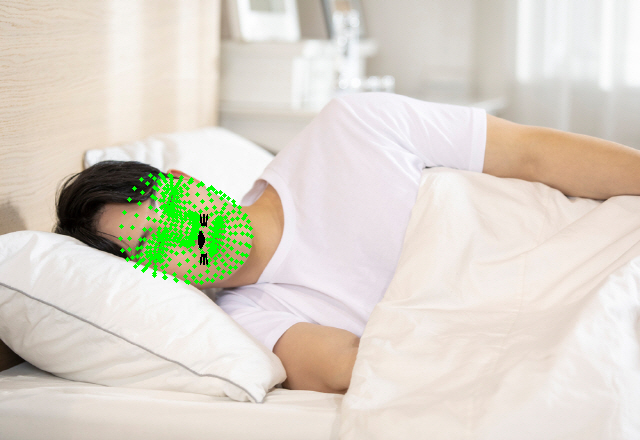

In [ ]:
import mediapipe as mp
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Mediapipe FaceMesh 모델 로드
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()  # 얼굴 랜드마크는 468개의 점

# 고양이 콧수염 이미지 로드 (알파 채널 포함)
whisker_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cat-whiskers.png', cv2.IMREAD_UNCHANGED)

# 이미지 불러오기
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image_side.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크 추출
results = face_mesh.process(image_rgb)

# 얼굴 랜드마크 점 그리기 및 콧수염 합성
if results.multi_face_landmarks:
    for landmarks in results.multi_face_landmarks:
        for landmark in landmarks.landmark:
            # 이미지 크기
            height, width, _ = image.shape

            # 좌표를 픽셀 값으로 변환
            x = int(landmark.x * width)
            y = int(landmark.y * height)

            # 각 랜드마크 좌표에 점 찍기
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

        # 코 끝 (Tip of the nose): landmarks[1]
        center_x = int(landmarks.landmark[1].x * width)  # 코의 x좌표
        center_y = int(landmarks.landmark[1].y * height)  # 코의 y좌표

        # 고양이 콧수염 이미지 크기
        whisker_height, whisker_width = whisker_image.shape[:2]

        # 콧수염 이미지 크기 변경 (좌측은 크게, 우측은 작게)
        left_part = whisker_image[:, :whisker_width//2]  # 왼쪽 절반
        left_part_resized = cv2.resize(left_part, (whisker_width//10, whisker_height//10))  # 크기 늘리기
        right_part = whisker_image[:, whisker_width//2:]  # 오른쪽 절반
        right_part_resized = cv2.resize(right_part, (whisker_width//10, whisker_height//10))  # 크기 줄이기
        modified_whisker = np.hstack([left_part_resized, right_part_resized])

        # 콧수염을 90도 왼쪽으로 회전 (시계반대방향)
        center = (modified_whisker.shape[1] // 2, modified_whisker.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, 90, 1.0)  # 90도로 회전 (시계반대방향)
        rotated_whisker = cv2.warpAffine(modified_whisker, rotation_matrix, (modified_whisker.shape[1], modified_whisker.shape[0]))

        # 콧수염 이미지를 이미지에 맞게 배치
        top_left_x = int(center_x) - 40  # 수염의 X 위치
        top_left_y = int(center_y) - 15  # 수염의 Y 위치

        # 경계를 벗어나지 않도록 처리
        top_left_x = max(0, top_left_x)
        top_left_y = max(0, top_left_y)
        bottom_right_x = min(image.shape[1], top_left_x + rotated_whisker.shape[1])
        bottom_right_y = min(image.shape[0], top_left_y + rotated_whisker.shape[0])

        # 콧수염이 원본 이미지 크기를 벗어나지 않도록 잘라내기
        rotated_whisker_cropped = rotated_whisker[:bottom_right_y - top_left_y, :bottom_right_x - top_left_x]

        # 알파 채널을 기준으로 합성 (투명도를 고려)
        for i in range(rotated_whisker_cropped.shape[0]):
            for j in range(rotated_whisker_cropped.shape[1]):
                if rotated_whisker_cropped[i, j, 3] > 0:  # 알파 값이 0이 아니면
                    image[top_left_y + i, top_left_x + j] = rotated_whisker_cropped[i, j, :3]  # BGR값으로 설정

# 결과 이미지 표시
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()